<a href="https://colab.research.google.com/github/5Spaak/Machine_Learning_Model/blob/main/Machine_Learning_Model_Using_Regression_and_Random_Forest(delaney_solubility_with_descriptors_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Model Using Regression and Random Forest(delaney_solubility_with_descriptors.csv)**

# **Load data**
This is the data set of the solubility of the molecules. And they are important in the fact that they are crucial for biologist and chemists in figured out whether a molecule is soluble in water or solvent and whether they will be good drug candidates.

In [32]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data preparation**

### **Data separation**

In [33]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [34]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data Splitting**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

In [36]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [37]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [38]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [39]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

# **Model Building**

## **Linear Regression**

**Training the model**

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Applying the model to make a prediction**

In [41]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

**Evaluate model performance**

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [43]:
lr_train_mse

1.0075362951093687

In [44]:
lr_test_mse

1.0206953660861033

In [45]:
print('LR MSE (Train) : ',lr_train_mse)
print('LR R2 (Train) : ',lr_train_r2)
print('LR MSE (test) : ',lr_test_mse)
print('LR R2 (Test) : ',lr_test_r2)

LR MSE (Train) :  1.0075362951093687
LR R2 (Train) :  0.7645051774663391
LR MSE (test) :  1.0206953660861033
LR R2 (Test) :  0.7891616188563282


In [46]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2','Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **RandomForest**

### **Training the model**

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [48]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluae model performance**

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [50]:
print('LR MSE (Train) : ',rf_train_mse)
print('LR R2 (Train) : ',rf_train_r2)
print('LR MSE (test) : ',rf_test_mse)
print('LR R2 (Test) : ',rf_test_r2)

LR MSE (Train) :  1.028227802112806
LR R2 (Train) :  0.7596688824431413
LR MSE (test) :  1.407688264904896
LR R2 (Test) :  0.7092230211002489


In [51]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


# **Model comparison**

In [52]:
df = pd.concat([lr_results, rf_results], axis=0)
df

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization for our prediction results**

Text(0.5, 0, 'Experimental LogS')

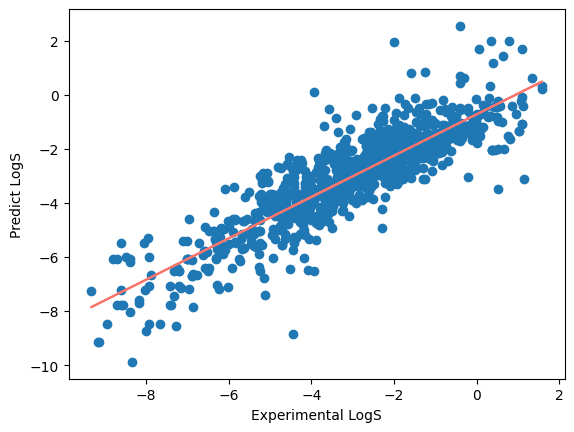

In [53]:
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(x=y_train, y=y_lr_train_pred)

z= np.polyfit(y_train, y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
